# Package Management

In [ ]:
# https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news/code
import numpy as np 
import pandas as pd 

from nltk import tokenize
import re

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load Dataset

In [ ]:
df = pd.read_csv('data.csv', names=['Label', 'Text'], encoding='latin-1')

# Data Exploration

In [ ]:
print(df)

         Label                                               Text
0      neutral  According to Gran , the company has no plans t...
1      neutral  Technopolis plans to develop in stages an area...
2     negative  The international electronic industry company ...
3     positive  With the new production plant the company woul...
4     positive  According to the company 's updated strategy f...
...        ...                                                ...
4841  negative  LONDON MarketWatch -- Share prices ended lower...
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844  negative  Net sales of the Paper segment decreased to EU...
4845  negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]


In [ ]:
df["Label"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [ ]:
df["Label"].value_counts()

neutral     2879
positive    1363
negative     604
Name: Label, dtype: int64

# Data Preprocessing

In [ ]:
def preprocess(sentence):
  """
  Parameters
  ----------
  sentence: string
    A sentence that is not preprocessed yet

  Return
  ------
  sentence: string
    A sentence after preprocessed

  Description
  -----------
  Preprocesses conducted: 
  1) Convert the sentence to lowercase
  2) Remove special characters
  3) Remove stopwords
  4) Stemming
  """

  # convert to lowercase
  sentence = sentence.lower()

  # remove special characters
  sentence = re.sub('[^a-z0-9]+', ' ', sentence)

  # remove stop words and stemming
  sentence = ' '.join([ps.stem(word) for word in sentence.split() if word not in stop])

  return sentence
    
    
def tokenize(sentences):
  """
  Parameters
  ----------
  sentences: list of string
    A list of sentences after preprocessed

  Return
  ------
  sequences: list of int
    A list of number that represents the index of the word in the 
    tokenizer.word_index

  unique_word_count: int
    Number of unique words found 

  Description
  -----------
  Tokenize the sentences, convert it to index
  """
    
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(sentences)
  
  seq = tokenizer.texts_to_sequences(sentences)
  max_sentences_len = len(max(seq, key=len))
  
  print('Max Sentence Length:', max_sentences_len)
  
  sequences = pad_sequences(seq, maxlen=max_sentences_len, padding='post')
  print("Tokenizer Words Indexes")
  print("-----------------------")
  print(tokenizer.word_index)
  unique_word_count = len(tokenizer.word_index)
  return sequences, unique_word_count


In [ ]:
df_text = [preprocess(sentence) for sentence in df['Text'].tolist()]

In [ ]:
df_text_tokenized, unique_word_count = tokenize(df_text)
print(f"Count of Unique Words: {unique_word_count}")

Max Sentence Length: 69
Tokenizer Words Indexes
-----------------------
{'eur': 1, 'compani': 2, 'oper': 3, 'said': 4, 'finnish': 5, 'mn': 6, 'sale': 7, '1': 8, 'year': 9, 'share': 10, 'million': 11, 'profit': 12, 'net': 13, 'finland': 14, '2': 15, 'servic': 16, '5': 17, 'group': 18, '3': 19, 'product': 20, 'market': 21, '2009': 22, '2008': 23, '4': 24, 'busi': 25, 'mln': 26, '0': 27, 'new': 28, 'period': 29, 'quarter': 30, '2007': 31, '2010': 32, 'total': 33, '6': 34, 'oyj': 35, '7': 36, '8': 37, 'increas': 38, 'euro': 39, '9': 40, 'also': 41, '000': 42, 'develop': 43, 'includ': 44, 'first': 45, '2006': 46, 'contract': 47, 'solut': 48, 'helsinki': 49, 'report': 50, 'invest': 51, 'compar': 52, 'manag': 53, 'provid': 54, 'bank': 55, 'base': 56, 'loss': 57, 'industri': 58, 'corpor': 59, 'manufactur': 60, 'unit': 61, 'technolog': 62, 'order': 63, 'today': 64, 'plant': 65, 'mobil': 66, 'custom': 67, 'expect': 68, 'nokia': 69, 'system': 70, '10': 71, 'financi': 72, 'per': 73, 'accord': 74, 

In [ ]:
print(df_text[0])
print(df_text_tokenized[0])

accord gran compani plan move product russia although compani grow
[  74 2767    2   89  411   20  122 2264    2  436    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [ ]:
def transform_labels(labels):
  """
  Parameters 
  ----------
  labels: list of string
    A list of sentiment polarity labels for the sentences

  Return 
  ------
  labels: numpy.ndarray
    Numpy array that contains the numbers in which 0 represent negative, 
    1 represents positive and 2 represents neutral

  Description
  -----------
  Transform the labels from string to integer
  """
  for i in range(len(labels)):
    x = labels[i]
    if x == 'negative':
      labels[i] = 0
    elif x == 'positive':
      labels[i] = 1
    else:
      labels[i] = 2

  return np.array(labels)

In [ ]:
labels = transform_labels(df["Label"].tolist())
print(labels)

[2 2 0 ... 0 0 0]


In [ ]:
def split_data(data , label, train_ratio = 0.6, validation_ratio = 0.2, test_ratio = 0.2):
  """
  Parameters
  ----------
  data: numpy.ndarray
    The tokenized and preprocessed sentences
     
  label: numpy.ndarray
    Numpy array that contains the numbers in which 0 represent negative, 
    1 represents positive and 2 represents neutral

  train_ratio: float (default value is 0.6)
    Ratio of the train set to the whole dataset

  validation_ratio: float (default value is 0.2)
    Ratio of the validation set to the whole dataset

  test_ratio: float (default value is 0.2)
    Ratio of the test set to the whole dataset

  Return
  ------
  x_train: numpy.ndarray
    Numbers that represent the words in sentences for model training

  x_val: numpy.ndarray
    Numbers that represent the words in sentences for cross validation

  x_test: numpy.ndarray
    Numbers that represent the words in sentences for model evaluation

  y_train: numpy.ndarray
    Numbers that represent the labels for the sentences for model training

  y_val: numpy.ndarray
    Numbers that represent the labels for the sentences for cross validation

  y_test: numpy.ndarray
    Numbers that represent the labels for the sentences for model evaluation

  Description
  -----------
  Split the dataset into train set, validation set and test set
  """
    
  # Split into 60% train set and 40% test set
  x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 1 - train_ratio, random_state = 1)

  # Split half of the test set to become test set and validation set
  # Because half of 40% will be 20% 
  # Thus, we could get 20% test set and 20% validation set
  test_size = test_ratio / (test_ratio + validation_ratio)
  x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = test_size, random_state = 1)

  return x_train, x_val, x_test, y_train, y_val, y_test


In [ ]:
x_train, x_val, x_test, y_train, y_val, y_test = split_data(df_text_tokenized, labels)

In [ ]:
print(f"Train set shape: {x_train.shape}")
print(f"Validation set shape: {x_val.shape}")
print(f"Test set shape: {x_test.shape}")

Train set shape: (2907, 69)
Validation set shape: (969, 69)
Test set shape: (970, 69)


# Data Modelling

In [ ]:
def build_model(algorithm = tf.keras.layers.GRU):
  """
  Parameters
  ----------
  algorithm: Keras layer
    The algorithm used in fitting the inputs. In this case, only GRU and LSTM
    are used.

  Return
  ------
  model: Keras model
    The compiled model

  Description
  -----------
  Build the architecture of the model
  """
  inputs = tf.keras.Input(shape=(x_train.shape[1],))

  x = tf.keras.layers.Embedding(input_dim = unique_word_count + 1,
                                output_dim = 128,
                                input_length = x_train.shape[1])(inputs)
  x = algorithm(256, return_sequences = True, activation = 'tanh')(x)
  x = tf.keras.layers.Dropout(0.3)(x)
  x = tf.keras.layers.Flatten()(x)
  outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
GRUmodel = build_model()

In [ ]:
GRUhistory = GRUmodel.fit(
    x_train,    
    y_train,
    validation_data=(x_val, y_val),
    batch_size = 32,
    epochs = 20
)

Epoch 1/20
91/91 [==============================] - 4s 23ms/step - loss: 0.9277 - accuracy: 0.5931 - val_loss: 0.9332 - val_accuracy: 0.5810
Epoch 2/20
91/91 [==============================] - 2s 18ms/step - loss: 0.8945 - accuracy: 0.6017 - val_loss: 0.9104 - val_accuracy: 0.5862
Epoch 3/20
91/91 [==============================] - 2s 18ms/step - loss: 0.8242 - accuracy: 0.6433 - val_loss: 0.8108 - val_accuracy: 0.6419
Epoch 4/20
91/91 [==============================] - 2s 17ms/step - loss: 0.6632 - accuracy: 0.7007 - val_loss: 0.7719 - val_accuracy: 0.6563
Epoch 5/20
91/91 [==============================] - 2s 18ms/step - loss: 0.5076 - accuracy: 0.7798 - val_loss: 0.7997 - val_accuracy: 0.6667
Epoch 6/20
91/91 [==============================] - 2s 18ms/step - loss: 0.4088 - accuracy: 0.8208 - val_loss: 1.1229 - val_accuracy: 0.6594
Epoch 7/20
91/91 [==============================] - 2s 18ms/step - loss: 0.3505 - accuracy: 0.8400 - val_loss: 1.1270 - val_accuracy: 0.6533
Epoch 8/20
91

In [ ]:
LSTMmodel = build_model(algorithm = tf.keras.layers.LSTM)

In [ ]:
LSTMhistory = LSTMmodel.fit(
    x_train,    
    y_train,
    validation_data=(x_val, y_val),
    batch_size = 32,
    epochs = 20
)

Epoch 1/20
91/91 [==============================] - 4s 28ms/step - loss: 0.9326 - accuracy: 0.5968 - val_loss: 0.9283 - val_accuracy: 0.5810
Epoch 2/20
91/91 [==============================] - 2s 20ms/step - loss: 0.8764 - accuracy: 0.6161 - val_loss: 0.8547 - val_accuracy: 0.6367
Epoch 3/20
91/91 [==============================] - 2s 19ms/step - loss: 0.7328 - accuracy: 0.6791 - val_loss: 0.7767 - val_accuracy: 0.6533
Epoch 4/20
91/91 [==============================] - 2s 19ms/step - loss: 0.5631 - accuracy: 0.7568 - val_loss: 0.7786 - val_accuracy: 0.6656
Epoch 5/20
91/91 [==============================] - 2s 18ms/step - loss: 0.4550 - accuracy: 0.8029 - val_loss: 0.8878 - val_accuracy: 0.6512
Epoch 6/20
91/91 [==============================] - 2s 18ms/step - loss: 0.3779 - accuracy: 0.8314 - val_loss: 0.9100 - val_accuracy: 0.6347
Epoch 7/20
91/91 [==============================] - 2s 18ms/step - loss: 0.3287 - accuracy: 0.8486 - val_loss: 1.1563 - val_accuracy: 0.6388
Epoch 8/20
91

# Model Evaluation

In [ ]:
def evaluate_model(model, x_test, y_test):
  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis = 1)

  # accuracy score
  print(pd.DataFrame(confusion_matrix(y_test, y_pred),
      index=['Actual Negative', 'Actual Positive', 'Actual Neutral'], 
      columns=['Predicted Negative', 'Predicted Positive', 'Predicted Neutral']))
  print("\n")
  print(classification_report(y_test, y_pred))

In [ ]:
def plotLossAccGraph(history):
  plt.figure(figsize=(14,4))

  plt.subplot(1, 2, 1)
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.subplot(1, 2, 2)
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.show()


GRU Model
---------


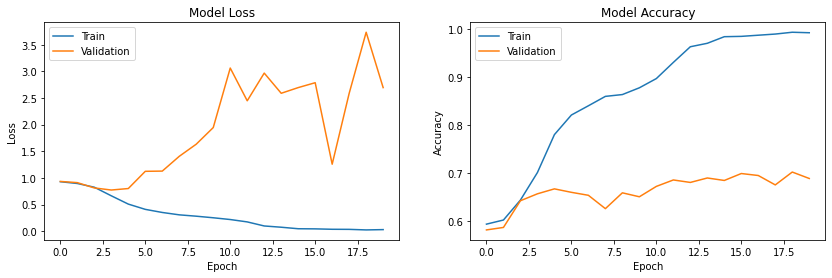

                 Predicted Negative  Predicted Positive  Predicted Neutral
Actual Negative                  58                  34                 28
Actual Positive                  18                 188                 77
Actual Neutral                   21                 117                429


              precision    recall  f1-score   support

           0       0.60      0.48      0.53       120
           1       0.55      0.66      0.60       283
           2       0.80      0.76      0.78       567

    accuracy                           0.70       970
   macro avg       0.65      0.63      0.64       970
weighted avg       0.71      0.70      0.70       970



In [ ]:
print("GRU Model")
print("---------")
plotLossAccGraph(GRUhistory.history)
evaluate_model(GRUmodel, x_test, y_test)

LSTM Model
----------


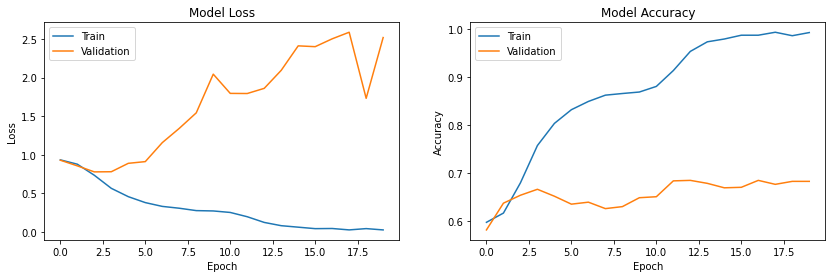

                 Predicted Negative  Predicted Positive  Predicted Neutral
Actual Negative                  47                  28                 45
Actual Positive                  19                 172                 92
Actual Neutral                   17                  87                463


              precision    recall  f1-score   support

           0       0.57      0.39      0.46       120
           1       0.60      0.61      0.60       283
           2       0.77      0.82      0.79       567

    accuracy                           0.70       970
   macro avg       0.65      0.61      0.62       970
weighted avg       0.70      0.70      0.70       970



In [ ]:
print("LSTM Model")
print("----------")
plotLossAccGraph(LSTMhistory.history)
evaluate_model(LSTMmodel, x_test, y_test)